<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Machine Learning Foundation***


## ***Feature Engineering with Linear Regression: Applied to the Ames Housing Data***

$ \ $

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), [www.amstat.org/publications/jse/v19n3/decock.pdf](http://www.amstat.org/publications/jse/v19n3/decock.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)

In this notebook, we will build some linear regression models to predict housing prices from this data. In particular, we will set out (exponer) to improve on a baseline set of features via **feature engineering**: deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

$ \ $

-----

## ***Notebook Contents***

$(1)$ Simple EDA (exploratory data analysis)

$(2)$ One-hot Encoding variables

$(3)$ Log transformation for skewed variables

$(4)$  Pair plot for features

$(5)$  Basic feature engineering: adding polynomial and interaction terms

$(6)$  Feature engineering: categories and features derived from category aggregates


$ \ $ 

----

## ***Simple EDA (exploratory data analysis)***

$(1)$ To begin with, we export some libraries.

In [1]:
# Surpress warnings (suprimir advertencias)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

Populating the interactive namespace from numpy and matplotlib


$ \ $

$(2)$ Load the Data, Examine and Explore.

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data.tsv", sep='\t')

$ \ $

$(3)$ Examine the columns, look at missing data.

In [4]:
print("Shape = ", df.shape, "\n \n")
df.info();

Shape =  (2930, 82) 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   obj

$ \ $

$(4)$ This is recommended by the data set author to remove a few outliers.

In [5]:
df = df.loc[df['Gr Liv Area'] <= 4000, :]
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])

Number of rows in the data: 2925
Number of columns in the data: 82


In [7]:
data = df.copy() 

In [8]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


$ \ $ 

----

## ***One-hot encoding for encoding variables***

We're going to first do some basic data cleaning on this data:

*   Converting categorical variables to dummies 

*   Making skew variables symmetric


In [9]:
df.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [10]:
# we verify that all values are object type
df.dtypes[df.dtypes == np.object].head()

MS Zoning       object
Street          object
Alley           object
Lot Shape       object
Land Contour    object
dtype: object

In [11]:
df.dtypes[df.dtypes == np.object].index

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [12]:
# Get a Pd.Series consisting of all the string categoricals

#(1) filtering by string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  

#(2) list of categorical fields
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  

#(3) we show on the screen our results
one_hot_encode_cols

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [13]:
df[one_hot_encode_cols]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [14]:
df[one_hot_encode_cols].T.head()

,0,1,2,3,4,5,6,7,8,9,...,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929
MS Zoning,RL,RH,RL,RL,RL,RL,RL,RL,RL,RL,...,RM,RL,RL,RL,RL,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1,IR1,Reg,IR1,IR1,Reg,...,Reg,IR1,Reg,Reg,Reg,IR1,IR1,Reg,Reg,Reg
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,HLS,Lvl,Lvl,...,Lvl,Lvl,Lvl,Low,Lvl,Lvl,Low,Lvl,Lvl,Lvl


In [72]:
# esto es para mirar como funciona la primera linea
intento = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],'C': [1, 2, 3]})
pd.get_dummies(intento, columns=['A', 'B'])

,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [15]:
# Do the one hot encoding
df = pd.get_dummies(df, columns = one_hot_encode_cols, drop_first = True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2925.0,1.464795e+03,8.464417e+02,1.0,732.0,1463.0,2199.0,2.930000e+03
PID,2925.0,7.143931e+08,1.887274e+08,526301100.0,528477030.0,535453210.0,907180130.0,1.007100e+09
MS SubClass,2925.0,5.739658e+01,4.266875e+01,20.0,20.0,50.0,70.0,1.900000e+02
Lot Frontage,2435.0,6.902382e+01,2.271092e+01,21.0,58.0,68.0,80.0,3.130000e+02
Lot Area,2925.0,1.010358e+04,7.781999e+03,1300.0,7438.0,9428.0,11515.0,2.152450e+05
...,...,...,...,...,...,...,...,...
Sale Condition_AdjLand,2925.0,4.102564e-03,6.393067e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Alloca,2925.0,8.205128e-03,9.022520e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Family,2925.0,1.572650e-02,1.244366e-01,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Normal,2925.0,8.246154e-01,3.803608e-01,0.0,1.0,1.0,1.0,1.000000e+00


$ \ $

----

##  ***Log transformation for skewed variables***

$(1)$ Create a list of float colums to check for skewing.


In [16]:
mask = data.dtypes == np.float
mask

Order             False
PID               False
MS SubClass       False
MS Zoning         False
Lot Frontage       True
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 82, dtype: bool

In [17]:
float_cols = data.columns[mask]
float_cols

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [77]:
# another answer
new_answ = data.select_dtypes("float")
new_answ.columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [73]:
data.select_dtypes("number")

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000


$ \ $

$(2)$ Define a skew limit and find out what columns have less skew than the given skew limit.

In [18]:
skew_limit = 0.75 
skew_vals = data[float_cols].skew()
skew_vals

Lot Frontage      1.111071
Mas Vnr Area      2.565458
BsmtFin SF 1      0.821985
BsmtFin SF 2      4.135900
Bsmt Unf SF       0.925021
Total Bsmt SF     0.399079
Bsmt Full Bath    0.615553
Bsmt Half Bath    3.965970
Garage Yr Blt    -0.382039
Garage Cars      -0.219734
Garage Area       0.213681
dtype: float64

In [19]:
# skew_vals = skew_vals.sort_values(ascending = False).to_frame().rename(columns={0:'Skew'})

In [20]:
# skew_vals

In [21]:
skew_cols = (skew_vals
             .sort_values(ascending = False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query(f"abs(Skew) > {skew_limit}"))

skew_cols

,Skew
BsmtFin SF 2,4.135900
Bsmt Half Bath,3.965970
Mas Vnr Area,2.565458
Lot Frontage,1.111071
Bsmt Unf SF,0.925021
BsmtFin SF 1,0.821985


$ \ $

$(3)$ Let's look at what happens to one of these features (in this case $\color{yellow}{\text{BsmtFin SF 1}}$), when we apply $\color{yellow}{\text{np.log1p}}$ visually.

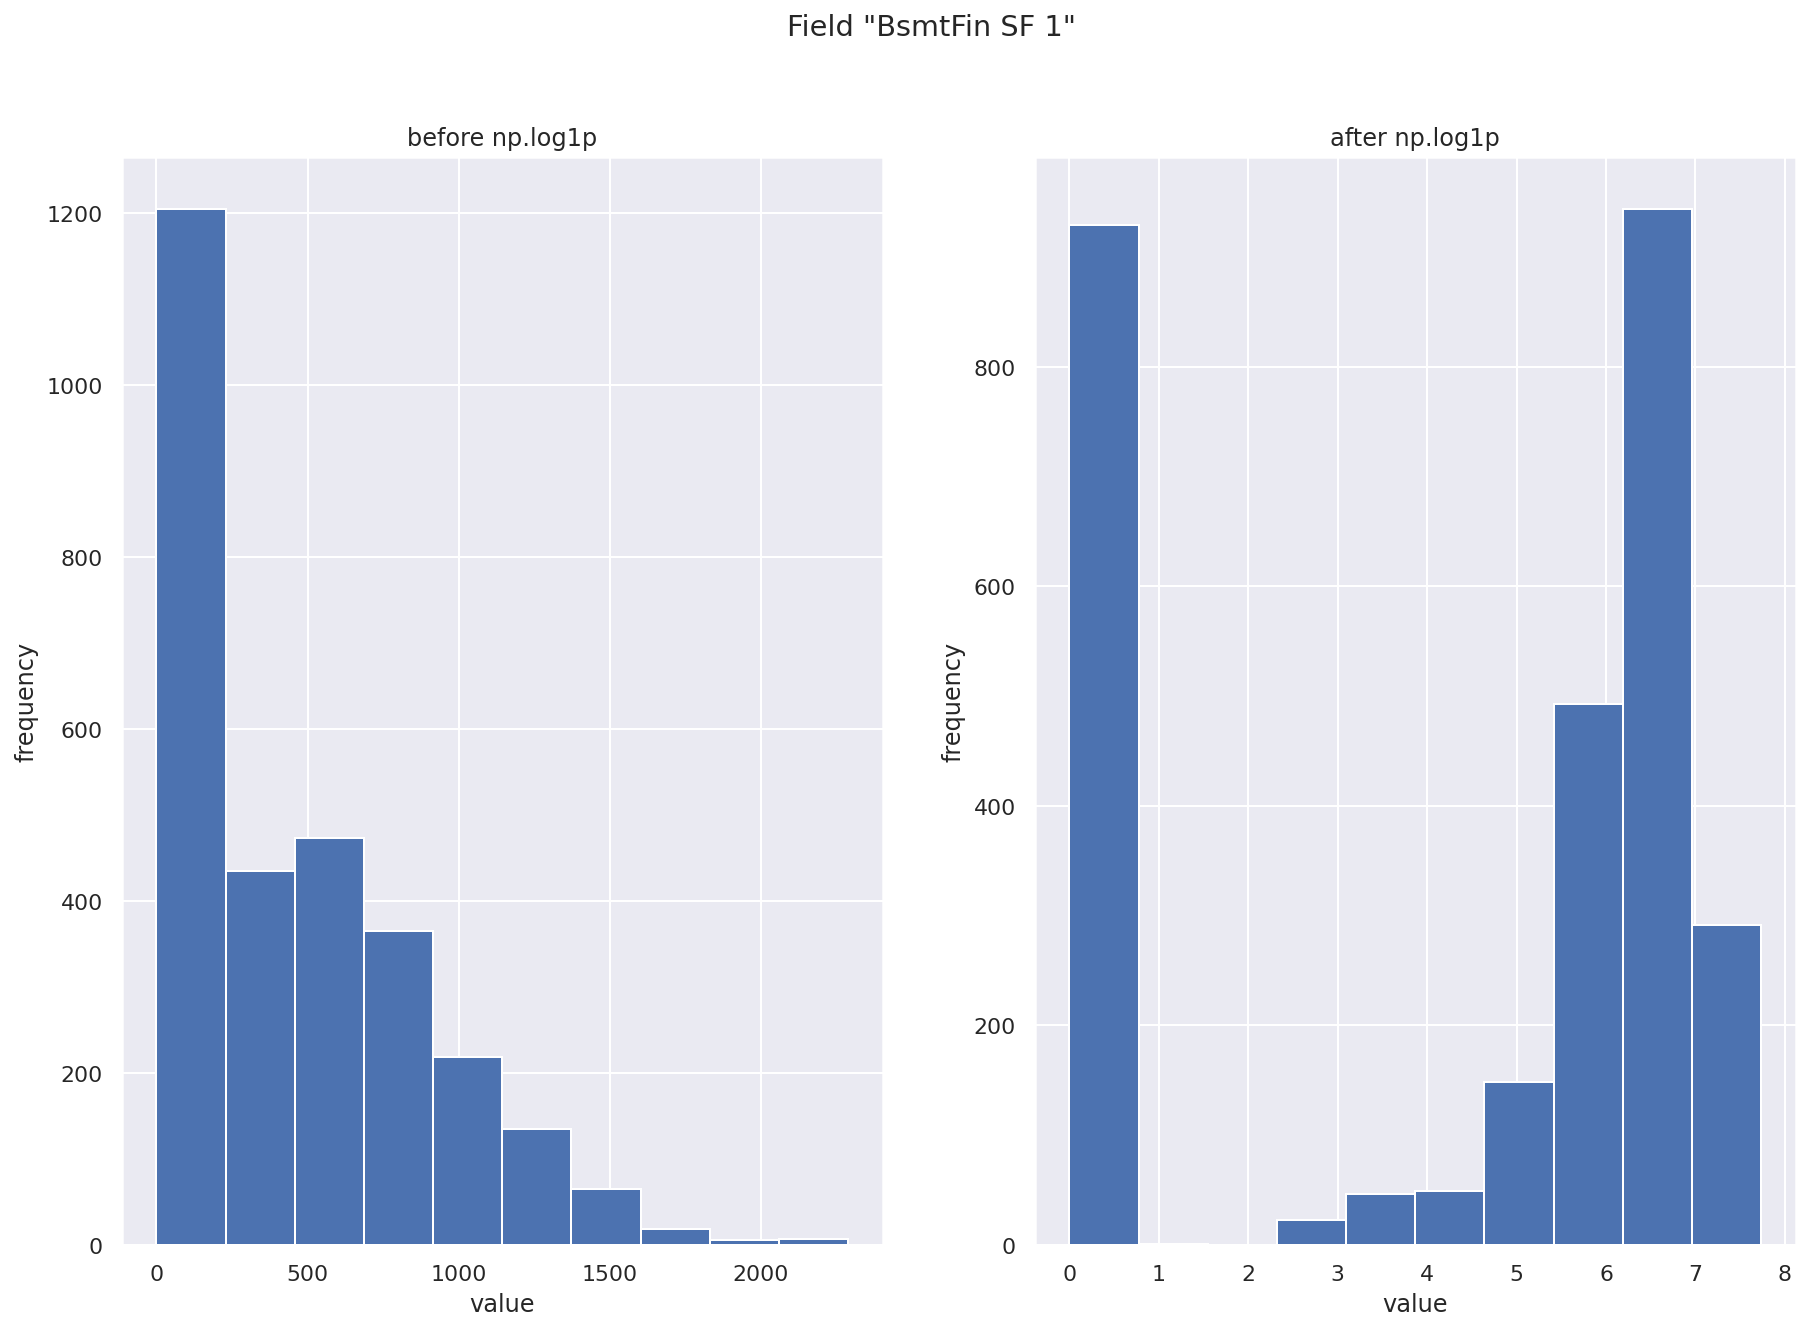

In [22]:
#(1) Choose a field
field = "BsmtFin SF 1"
before = df[field]
after = df[field].apply(np.log1p)


#(2) Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(15, 10))


#(3) Create a histogram on the "ax_before" subplot
before.hist(ax = ax_before)


#(4) Apply a log transformation (numpy syntax) to this column
after.hist(ax = ax_after)


#(5) Formatting of titles etc. for each subplot
ax_before.set(title = 'before np.log1p', ylabel = 'frequency', xlabel = 'value')

ax_after.set(title = 'after np.log1p', ylabel = 'frequency', xlabel = 'value')

fig.suptitle(f'Field "{field}"');

$ \ $

$(4)$ Let's lapply np.log1p to the features that are different from "SalePrice".

In [23]:
skew_cols

,Skew
BsmtFin SF 2,4.135900
Bsmt Half Bath,3.965970
Mas Vnr Area,2.565458
Lot Frontage,1.111071
Bsmt Unf SF,0.925021
BsmtFin SF 1,0.821985


In [24]:
lista = list(skew_cols.index.values)

In [25]:
for col in lista:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [26]:
df.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,4.955827,31770,6,5,1960,1960,4.727388,...,0,0,0,0,1,0,0,0,1,0
1,2,526350040,20,4.394449,11622,5,6,1961,1961,0.000000,...,0,0,0,0,1,0,0,0,1,0
2,3,526351010,20,4.406719,14267,6,6,1958,1958,4.691348,...,0,0,0,0,1,0,0,0,1,0
3,4,526353030,20,4.543295,11160,7,5,1968,1968,0.000000,...,0,0,0,0,1,0,0,0,1,0
4,5,527105010,60,4.317488,13830,5,5,1997,1998,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [27]:
df.shape

(2925, 262)

$ \ $

$(5)$ There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable. 


In [78]:
data.isnull()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,False,False,True,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False


In [79]:
data.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [28]:
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 82, dtype: int64

$ \ $ 

$(6)$ Let's pick out just a few numeric columns to illustrate basic feature transformations.

In [29]:
columns = ['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 'Garage Cars','SalePrice']

smaller_df = df.loc[:, columns]
smaller_df.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
0,31770,6,5,1960,1960,1656,1,3,2,2.0,215000
1,11622,5,6,1961,1961,896,1,2,0,1.0,105000
2,14267,6,6,1958,1958,1329,1,3,0,1.0,172000
3,11160,7,5,1968,1968,2110,2,3,2,2.0,244000
4,13830,5,5,1997,1998,1629,2,3,1,2.0,189900


In [30]:
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2925.0,10103.583590,7781.999124,1300.0,7438.0,9428.0,11515.0,215245.0
Overall Qual,2925.0,6.088205,1.402953,1.0,5.0,6.0,7.0,10.0
Overall Cond,2925.0,5.563761,1.112262,1.0,5.0,5.0,6.0,9.0
Year Built,2925.0,1971.302906,30.242474,1872.0,1954.0,1973.0,2001.0,2010.0
Year Remod/Add,2925.0,1984.234188,20.861774,1950.0,1965.0,1993.0,2004.0,2010.0
Gr Liv Area,2925.0,1493.978803,486.273646,334.0,1126.0,1441.0,1740.0,3820.0
Full Bath,2925.0,1.564786,0.551386,0.0,1.0,2.0,2.0,4.0
Bedroom AbvGr,2925.0,2.853675,0.827737,0.0,2.0,3.0,3.0,8.0
Fireplaces,2925.0,0.596923,0.645349,0.0,0.0,1.0,1.0,4.0
Garage Cars,2924.0,1.765048,0.759834,0.0,1.0,2.0,2.0,5.0


In [80]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 338.8 KB


In [81]:
# There appears to be one NA in Garage Cars - we will take a simple approach and fill it with 0
smaller_df = smaller_df.fillna(0)
smaller_df

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
0,31770,6,5,1960,1960,1656,1,3,2,2.0,215000
1,11622,5,6,1961,1961,896,1,2,0,1.0,105000
2,14267,6,6,1958,1958,1329,1,3,0,1.0,172000
3,11160,7,5,1968,1968,2110,2,3,2,2.0,244000
4,13830,5,5,1997,1998,1629,2,3,1,2.0,189900
...,...,...,...,...,...,...,...,...,...,...,...
2925,7937,6,6,1984,1984,1003,1,3,0,2.0,142500
2926,8885,5,5,1983,1983,902,1,2,0,2.0,131000
2927,10441,5,5,1992,1992,970,1,3,0,0.0,132000
2928,10010,5,5,1974,1975,1389,1,2,1,2.0,170000


In [82]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 338.8 KB


$ \ $

----

## ***Pairplot for features***


Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

$(1)$ Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!


In [34]:
sns.pairplot(smaller_df, plot_kws = dict(alpha = 0.1, edgecolor = 'none'))

Output hidden; open in https://colab.research.google.com to view.

$ \ $ 


$\color{aquamarine}{\text{Data Exploration Discussion.}}$ 

$(a)$ What do these plots tell us about the distribution of the target?   

$(b)$ What do these plots tell us about the relationship between the features and the target? 

$(c)$ Do you think that linear regression is well-suited to this problem? 

$(d)$ Do any feature transformations come to mind?

$(e)$ What do these plots tell us about the relationship between various pairs of features? 

$(f)$ Do you think there may be any problems here? 



$ \ $

$(2)$ Suppose our target variable is the "SalePrice". We can set up separate variables for features and target.


In [83]:
#Separate our features from our target

columns = ['Lot Area', 'Overall Qual', 'Overall Cond', 
            'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
            'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
            'Garage Cars']


X = smaller_df.loc[:, columns]

Y = smaller_df['SalePrice']

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 315.9 KB


$ \ $ 

---

## ***Note (how to use our data set).***

$(1)$ Now that we have $\color{aquamarine}{\text{(feature/target) data}}$ 

$$\begin{cases}
X \ \text{data},\\ \\
Y  \ \text{data}
\end{cases}$$
 
ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. We'll need to create a $\color{aquamarine}{\text{(train/validation) split}}$  before we fit and score the model.



$(2)$ Since we'll be repeatedly splitting $X$ and $Y$ into the same $\color{yellow}{\text{(train/val) partitions}}$ and $\color{yellow}{\text{(fitting/scoring) new models}}$ as we update our feature set, we'll define a reusable function that completes all these steps, making our (code/process) more efficient going forward.


$ \ $

-----

## ***Basic feature engineering: adding polynomial and interaction terms***

One of the first things that we looked for in the ***`pairplot`*** was evidence about the relationship between each feature and the target. In certain features like 


$$\begin{cases}
\text{Overall Qual},\\ \\
\text{Gr Liv Area}
\end{cases}$$

we notice an upward-curved relationship (relación de curva ascendente) rather than a simple linear correspondence. 




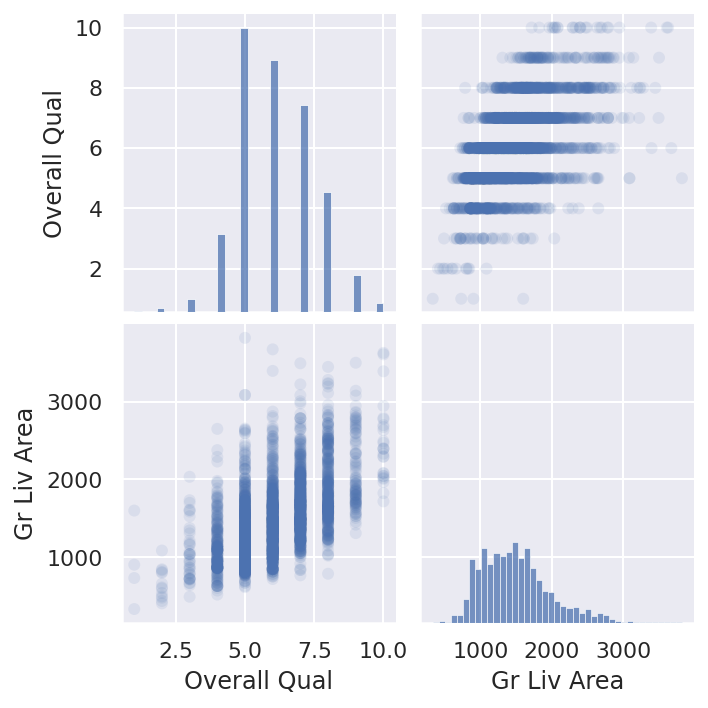

In [37]:
sns.pairplot(smaller_df[["Overall Qual", "Gr Liv Area"]], plot_kws = dict(alpha = 0.1, edgecolor = "none"))

This suggests that we should add quadratic ***`polynomial terms or transformations`*** for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

$ \ $

## ***Polynomial Features***

$ \ $

$(1)$ As we add to our baseline set of features, we'll create a copy of the latest benchmark (punto de referencia) so that we can continue to store our older feature sets.

In [84]:
columns = ['Lot Area', 'Overall Qual', 'Overall Cond', 
            'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
            'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
            'Garage Cars']


X = smaller_df.loc[:, columns]
Y = smaller_df['SalePrice']

In [85]:
X.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars
0,31770,6,5,1960,1960,1656,1,3,2,2.0
1,11622,5,6,1961,1961,896,1,2,0,1.0
2,14267,6,6,1958,1958,1329,1,3,0,1.0
3,11160,7,5,1968,1968,2110,2,3,2,2.0
4,13830,5,5,1997,1998,1629,2,3,1,2.0


In [86]:
Y.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

In [41]:
X2 = X.copy()

X2['OQ2'] = X2['Overall Qual'] ** 2

X2['GLA2'] = X2['Gr Liv Area'] ** 2

$ \ $

##  ***Interaction terms***

It is easy to nota that it is possible to treat some data features as an independent quantity. However, there may be $\color{aquamarine}{\text{interaction effects}}$, in which the impact of one feature may dependent on the current value of a different feature. For example in our data set, we have that:


* There may be a higher premium for increasing  ***`Overall Qual`*** for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies ***`Overall Qual`*** by ***`Year Built`*** can help us capture it.

* Another style of interaction term involves feature proportions. For example, to get something like quality per square foot we could divide ***`Overall Qual`*** by ***`Lot Area`***.

$(2)$ Let's try adding both of these interaction terms and see how they impact the model results.

In [42]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']

# Show on the screen the results
X3

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,OQ2,GLA2,OQ_x_YB,OQ_/_LA
0,31770,6,5,1960,1960,1656,1,3,2,2.0,36,2742336,11760,0.000189
1,11622,5,6,1961,1961,896,1,2,0,1.0,25,802816,9805,0.000430
2,14267,6,6,1958,1958,1329,1,3,0,1.0,36,1766241,11748,0.000421
3,11160,7,5,1968,1968,2110,2,3,2,2.0,49,4452100,13776,0.000627
4,13830,5,5,1997,1998,1629,2,3,1,2.0,25,2653641,9985,0.000362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,7937,6,6,1984,1984,1003,1,3,0,2.0,36,1006009,11904,0.000756
2926,8885,5,5,1983,1983,902,1,2,0,2.0,25,813604,9915,0.000563
2927,10441,5,5,1992,1992,970,1,3,0,0.0,25,940900,9960,0.000479
2928,10010,5,5,1974,1975,1389,1,2,1,2.0,25,1929321,9870,0.000500


$ \ $

---

## ***Feature engineering: categories and features derived from category aggregates***

## ***Categories***


Incorporating categorical features into linear regression models is fairly (bastante) straightforward. The algorithm ***`dummy variables`*** or ***`one-hot-encoding`*** shows us how to do that with the following steps:

* ***Step (1):*** Create a new feature column for each category value, 
 
* ***Step (2):*** Fill these columns with 1s and 0s to indicate which category is present for each row. 

$ \ $  

$(1)$ We'll first explore this using the ***`House Style`*** feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.


In [43]:
data['House Style'].value_counts()

1Story    1480
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

$ \ $

$(2)$ This looks ok, and here's a quick look at how dummy features actually appear:


In [45]:
pd.get_dummies(df['House Style'], drop_first=True).head()

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0


$ \ $

$(3)$ We can call `pd.get_dummies()` on our entire dataset to quickly get data with all the original features and dummy variable representation of any categorical features. Let's look at some variable values.


In [46]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [87]:
pd.get_dummies(df).head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,0,0,0,1,0,0,0,0,1,0
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,0,0,0,1,0,0,0,0,1,0
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,1,0,0,0,0,1,0
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,0,0,0,1,0,0,0,0,1,0


$ \ $

$(4)$ For this category, let's map the few least-represented neighborhoods to an "other" category before adding the feature to our feature set and running a new benchmark.


In [48]:
nb_counts = df["Neighborhood"].value_counts()
nb_counts

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [49]:
other_nbhs = list(nb_counts[nb_counts <= 8].index)
other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [50]:
df['Neighborhood']

0         NAmes
1         NAmes
2         NAmes
3         NAmes
4       Gilbert
         ...   
2925    Mitchel
2926    Mitchel
2927    Mitchel
2928    Mitchel
2929    Mitchel
Name: Neighborhood, Length: 2925, dtype: object

In [51]:
X4 = X3.copy()
X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')
X4['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Other       11
Blueste     10
Name: Neighborhood, dtype: int64

$ \ $



## ***Getting to fancier features***

Let's close out our introduction to feature engineering by considering a more complex type of feature that may work very nicely for certain problems. It doesn't seem to add a great deal over what we have so far, but it's a style of engineering to keep in mind for the future.

We'll create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, we'll calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution, e.g. how nice a house is relative to other houses in its neighborhood or of its style.

$ \ $

$(1)$ Below we define reusable code for generating features of this form, feel free to repurpose it for future feature engineering work!


In [52]:
# Aqui agrupamos y en ese agrupamiento sacamos los promedios
df.groupby("SalePrice").mean()["Order"]

SalePrice
12789      182.0
13100     1554.0
34900      727.0
35000     2844.0
35311     2881.0
           ...  
591587    1638.0
610000     433.0
611657      45.0
615000    1064.0
625000    2446.0
Name: Order, Length: 1028, dtype: float64

In [53]:
# Aqui agrupamos, luego sacamos los promedios en los grupos y luego le damos el valor a cada elemento del grupo como su promedio (BRUTAL)
df.groupby("SalePrice").transform(lambda x: x.mean())["Order"].round(2)

0       1610.67
1       1526.50
2       1827.83
3       1090.00
4          5.00
         ...   
2925    2558.83
2926    1972.10
2927    1636.71
2928    1625.00
2929    1950.11
Name: Order, Length: 2925, dtype: float64

In [54]:
def add_deviation_feature(data, feature, category):
    
    #(1) temp groupby object
    category_gb = data.groupby(category)
    
    #(2) create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())[feature]

    #(3) create category means and standard deviations for each observation
    category_std = category_gb.transform(lambda x: x.std())[feature]
    
    #(4) compute stds from category mean for each feature value,
    # add to data as new feature
    deviation_feature = (data[feature] - category_mean) / category_std 
    data[feature + '_Dev_' + category] = deviation_feature  
    return data[feature + '_Dev_' + category] 

$ \ $

$(2)$ Now let's use our feature generation code to add 2 new deviation features, and run a final benchmark.


In [55]:
#(1) Creamos una copia de X4 
X5 = X4.copy()


#(2) creamos una nueva columna para X5
X5['House Style'] = df['House Style']


#(3) usamos la funcion creada anteriormente con:
# data = X5
# feature = 'Year Built'
# category = 'House Style'
add_deviation_feature(X5, 'Year Built', 'House Style')


#(4) usamos la funcion creada anteriormente con:
# data = X5
# feature = 'Overall Qual'
# category = 'Neighborhood'
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')


#(5) Mostramos en pantalla nuestros resultados
X5

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,OQ2,GLA2,OQ_x_YB,OQ_/_LA,Neighborhood,House Style,Year Built_Dev_House Style,Overall Qual_Dev_Neighborhood
0,31770,6,5,1960,1960,1656,1,3,2,2.0,36,2742336,11760,0.000189,NAmes,1Story,-0.590334,0.857503
1,11622,5,6,1961,1961,896,1,2,0,1.0,25,802816,9805,0.000430,NAmes,1Story,-0.551186,-0.430205
2,14267,6,6,1958,1958,1329,1,3,0,1.0,36,1766241,11748,0.000421,NAmes,1Story,-0.668629,0.857503
3,11160,7,5,1968,1968,2110,2,3,2,2.0,49,4452100,13776,0.000627,NAmes,1Story,-0.277154,2.145211
4,13830,5,5,1997,1998,1629,2,3,1,2.0,25,2653641,9985,0.000362,Gilbert,2Story,0.545208,-2.101974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,7937,6,6,1984,1984,1003,1,3,0,2.0,36,1006009,11904,0.000756,Mitchel,SLvl,0.505068,0.434947
2926,8885,5,5,1983,1983,902,1,2,0,2.0,25,813604,9915,0.000563,Mitchel,1Story,0.310059,-0.518590
2927,10441,5,5,1992,1992,970,1,3,0,0.0,25,940900,9960,0.000479,Mitchel,SFoyer,1.096487,-0.518590
2928,10010,5,5,1974,1975,1389,1,2,1,2.0,25,1929321,9870,0.000500,Mitchel,1Story,-0.042269,-0.518590


$ \ $


## ***Polynomial Features in Scikit-Learn***

`sklearn` allows you to build many higher-order terms at once with `PolynomialFeatures`.


In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
# Instantiate and provide desired degree; 
# Note: degree = 2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [58]:
features = ['Lot Area', 'Overall Qual']
# "x0" = "Lot Area"
# "x1" = "Overall Qual"

results = df[features]
pf.fit(results)

PolynomialFeatures()

In [59]:
# Must add input_features = features for appropriate names
# un polinomio de dos variables x_0 y x_1 tiene la forma:
# f(x_0,x_1) = a_0,0 + a_1,0*x_0+a_0,1*x_1+a_1,1*x_0*x_1+a_2,0*x_0^2+a_0,2*x_1^2
pf.get_feature_names()  

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [60]:
features = ['Lot Area', 'Overall Qual']
results = df[features]
# "x0" = "Lot Area"
# "x1" = "Overall Qual"


feat_array = pf.transform(results)
# "x0" = "Lot Area"
# "x1" = "Overall Qual"
# "x0^2" = "Lot Area^2"
# "x0 x1" = "Lot Area Overall Qual"
# "x1^2" = "Overall Qual^2"


pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features = features))

,1,Lot Area,Overall Qual,Lot Area^2,Lot Area Overall Qual,Overall Qual^2
0,1.0,31770.0,6.0,1.009333e+09,190620.0,36.0
1,1.0,11622.0,5.0,1.350709e+08,58110.0,25.0
2,1.0,14267.0,6.0,2.035473e+08,85602.0,36.0
3,1.0,11160.0,7.0,1.245456e+08,78120.0,49.0
4,1.0,13830.0,5.0,1.912689e+08,69150.0,25.0
...,...,...,...,...,...,...
2920,1.0,7937.0,6.0,6.299597e+07,47622.0,36.0
2921,1.0,8885.0,5.0,7.894322e+07,44425.0,25.0
2922,1.0,10441.0,5.0,1.090145e+08,52205.0,25.0
2923,1.0,10010.0,5.0,1.002001e+08,50050.0,25.0


$ \ $

----

## ***Recap***

While we haven't yet turned (transformado) to prediction, these feature engineering exercises set the stage (escenario). Generally, feature engineering often follows a sort of [*Pareto principle*](https://en.wikipedia.org/wiki/Pareto_principle?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01), where a large bulk of the predictive gains (ganancias) can be reached through adding a set of intuitive, strong features like polynomial transforms and interactions. Directly incorporating additional information like categorical variables can also be very helpful. Beyond (más allá de) this point, additional feature engineering can provide significant, but potentially diminishing (menguante) returns. Whether it's worth it depends on the use case for the model.
